# DensityPlot Example Notebook

In [1]:
import numpy as np
from DensityPlot.plot import density2d
import matplotlib.pyplot as plt

## Let's generate some data

In [2]:
np.random.seed(0)
mean, cov = [0, 2], [(1, .8), (.8, 1)]
data = np.random.multivariate_normal(mean, cov, size=1000)
mean, cov = [5, 3], [(1, .4), (.4, 1)]
data2 = np.random.multivariate_normal(mean, cov, size=1000)
mean, cov = [10, 20], [(1, .5), (.5, 1)]
data3 = np.random.multivariate_normal(mean, cov, size=100)
combined = np.concatenate([data, data2])

## Inspect the raw data

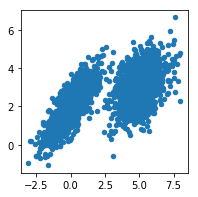

In [3]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(combined[:, 0], combined[:, 1], s=20);

## Making density plot is easy

### 2D-histogram and scatter 

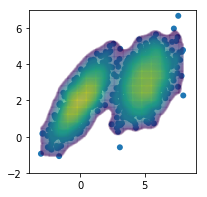

In [11]:
fig, ax = density2d(combined, alpha=0.03,
                    xlim=(-4, 9), ylim=(-2, 7), mode='scatter_mesh');

### 2D-histogram only

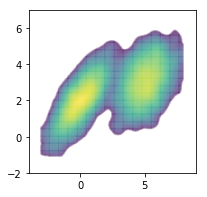

In [12]:
fig, ax = density2d(combined, alpha=0.03,
                    xlim=(-4, 9), ylim=(-2, 7), mode='mesh');

### Binned scatter (typically analyzed in FACS)

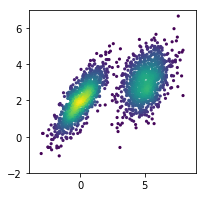

In [13]:
fig, ax = density2d(combined, alpha=0.03, s=10, mode='scatter',
                    xlim=(-4, 9), ylim=(-2, 7))

## Supplying two vectors instead of ndarray for input

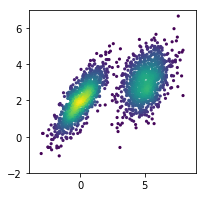

In [6]:
x = combined[:, 0]
y = combined[:, 1]
fig, ax = density2d(x=x, y=y, alpha=0.03, s=10, mode='scatter',
                    xlim=(-4, 9), ylim=(-2, 7))

## Adjusting the bin size

### Default: bins=300

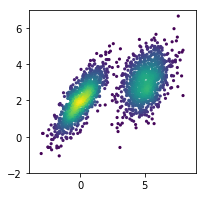

In [14]:
fig, ax = density2d(combined, bins=300, alpha=0.03, s=10, mode='scatter',
                    xlim=(-4, 9), ylim=(-2, 7))

### bins=50

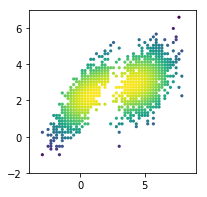

In [8]:
fig, ax = density2d(combined, bins=50, alpha=0.03, s=10, mode='scatter',
                    xlim=(-4, 9), ylim=(-2, 7))

### bins=1000

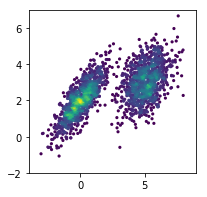

In [9]:
fig, ax = density2d(combined, bins=1000, alpha=0.03, s=10, mode='scatter',
                    xlim=(-4, 9), ylim=(-2, 7))

The larger ```bins``` value, the harder your computer will have to work to render.

## Adding labels and colorbar and some customization

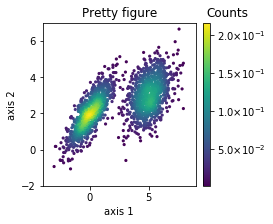

In [17]:
fig, ax = density2d(combined, alpha=0.03, s=10, title='Pretty figure', xlabel='axis 1',
                    xlim=(-4, 9), ylim=(-2, 7),
                    ylabel='axis 2', mode='scatter', colorbar=True)

## Normalize z-axis values as probability

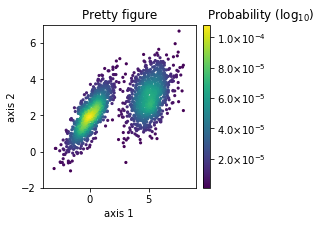

In [18]:
fig, ax = density2d(combined, alpha=0.03, s=10, title='Pretty figure', xlabel='axis 1',
                    xlim=(-4, 9), ylim=(-2, 7),
                    ylabel='axis 2', mode='scatter', colorbar=True, normed=True)

## Saving figure

In [ ]:
fig, ax = density2d(combined, alpha=0.03, s=10, title='scatter', xlabel='axis 1',
                    xlim=(-4, 9), ylim=(-2, 7),
                    ylabel='axis 2', mode='scatter', colorbar=True, normed=True,
                    filename='./examples/Example_scatter.png')

In [ ]:
fig, ax = density2d(combined, alpha=0.1, title='mesh', xlabel='axis 1',
                    xlim=(-4, 9), ylim=(-2, 7),
                    ylabel='axis 2', mode='mesh', colorbar=True, normed=True,
                    filename='./examples/Example_mesh.png')

In [ ]:
fig, ax = density2d(combined, alpha=0.3, title='scatter_mesh', xlabel='axis 1',
                    xlim=(-4, 9), ylim=(-2, 7), s=10, dot_alpha=0.2,
                    color='C3', mesh_order='bottom', ylabel='axis 2', mode='scatter_mesh',
                    colorbar=True, normed=True, filename='./examples/Example_scatter_mesh.png')

## Plotting on top of existing figure

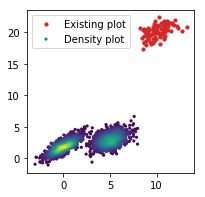

In [16]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(data3[:, 0], data3[:, 1], s=10, label='Existing plot', color='C3');
density2d(combined, ax=ax, alpha=0.03, s=10, mode='scatter', label='Density plot')
ax.legend();